In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
from nilearn import plotting, datasets
from nilearn.image import mean_img , index_img
from nilearn.image import new_img_like
from nilearn.maskers import NiftiLabelsMasker , NiftiMasker

In [17]:
HOA = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

In [19]:
HOA.labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [21]:
HOA.maps

In [23]:
HOA.filename

'C:\\Users\\Nafir/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

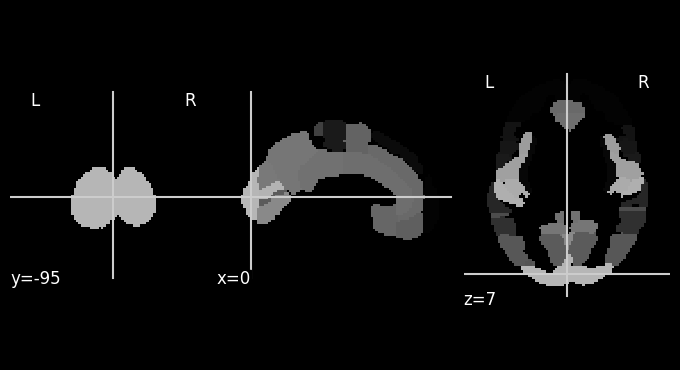

In [25]:
plotting.plot_anat(HOA.maps)

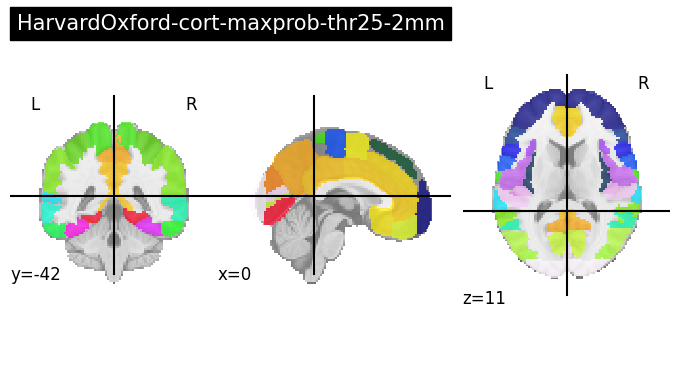

In [27]:
plotting.plot_roi(HOA.maps, title = 'HarvardOxford-cort-maxprob-thr25-2mm')

In [29]:
rest = nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\rest\dswusub-04_func_sub-04_task-rest_bold.nii')

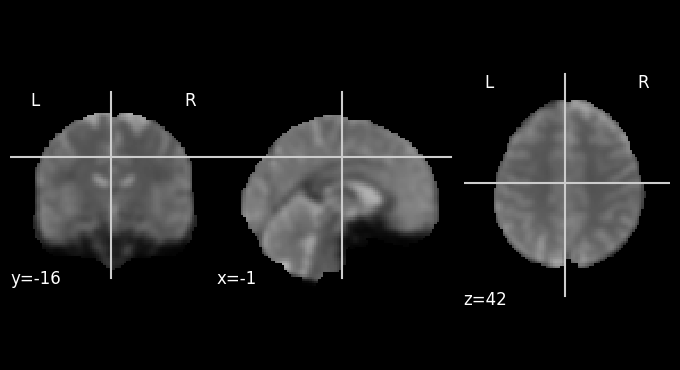

In [31]:
plotting.plot_anat(mean_img(rest))

In [33]:
masker = NiftiLabelsMasker(labels_img = HOA.filename, labels= HOA.labels)

In [35]:
masker.fit()

NiftiLabelsMasker(labels=['Background', 'Frontal Pole', 'Insular Cortex',
                          'Superior Frontal Gyrus', 'Middle Frontal Gyrus',
                          'Inferior Frontal Gyrus, pars triangularis',
                          'Inferior Frontal Gyrus, pars opercularis',
                          'Precentral Gyrus', 'Temporal Pole',
                          'Superior Temporal Gyrus, anterior division',
                          'Superior Temporal Gyrus, posterior division',
                          'Middle Temporal Gyrus, anterior division',
                          'Mi...
                          'Lateral Occipital Cortex, inferior division',
                          'Intracalcarine Cortex', 'Frontal Medial Cortex',
                          'Juxtapositional Lobule Cortex (formerly '
                          'Supplementary Motor Cortex)',
                          'Subcallosal Cortex', 'Paracingulate Gyrus',
                          'Cingulate Gyrus, anterior division', ...],
                  labels_img='C:\\Users\\Nafir/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz')

In [37]:
masker.generate_report()

C:\Users\Nafir\AppData\Local\Temp\ipykernel_12376\1574612842.py:1: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROIs of label image on the MNI152Template for reporting.
  masker.generate_report()


In [39]:
tims = masker.fit_transform(rest)

In [41]:
tims.shape

(200, 48)

In [43]:
tims

array([[103.36015 , 118.62977 , 115.61313 , ..., 105.93435 , 114.00582 ,
        102.942024],
       [103.55395 , 118.43446 , 115.52244 , ..., 105.79733 , 114.01742 ,
        102.95303 ],
       [103.38608 , 118.544395, 115.59422 , ..., 105.88646 , 114.01042 ,
        102.92662 ],
       ...,
       [103.40986 , 118.769585, 115.59633 , ..., 106.33697 , 114.214874,
        102.99179 ],
       [103.44428 , 118.63801 , 115.64177 , ..., 105.89553 , 113.70959 ,
        103.23593 ],
       [103.26512 , 118.36336 , 115.562485, ..., 105.58542 , 113.135666,
        103.136566]], dtype=float32)

In [45]:
region_names = masker.region_names_

In [47]:
region_names

{0: 'Frontal Pole',
 1: 'Insular Cortex',
 2: 'Superior Frontal Gyrus',
 3: 'Middle Frontal Gyrus',
 4: 'Inferior Frontal Gyrus, pars triangularis',
 5: 'Inferior Frontal Gyrus, pars opercularis',
 6: 'Precentral Gyrus',
 7: 'Temporal Pole',
 8: 'Superior Temporal Gyrus, anterior division',
 9: 'Superior Temporal Gyrus, posterior division',
 10: 'Middle Temporal Gyrus, anterior division',
 11: 'Middle Temporal Gyrus, posterior division',
 12: 'Middle Temporal Gyrus, temporooccipital part',
 13: 'Inferior Temporal Gyrus, anterior division',
 14: 'Inferior Temporal Gyrus, posterior division',
 15: 'Inferior Temporal Gyrus, temporooccipital part',
 16: 'Postcentral Gyrus',
 17: 'Superior Parietal Lobule',
 18: 'Supramarginal Gyrus, anterior division',
 19: 'Supramarginal Gyrus, posterior division',
 20: 'Angular Gyrus',
 21: 'Lateral Occipital Cortex, superior division',
 22: 'Lateral Occipital Cortex, inferior division',
 23: 'Intracalcarine Cortex',
 24: 'Frontal Medial Cortex',
 25: 'J

In [51]:
tims_df = pd.DataFrame(tims, columns = region_names.values())

In [53]:
tims_df

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division",...,Temporal Occipital Fusiform Cortex,Occipital Fusiform Gyrus,Frontal Opercular Cortex,Central Opercular Cortex,Parietal Opercular Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole
0,103.360153,118.629768,115.613129,114.241287,120.237137,116.683220,109.261528,88.474747,110.295273,101.179504,...,100.419693,109.496666,114.151146,104.870834,105.737801,115.840439,106.811951,105.934349,114.005821,102.942024
1,103.553947,118.434464,115.522438,114.296310,120.431541,116.790657,109.193390,88.411171,110.196320,101.257690,...,100.390533,109.448364,114.055222,104.709244,105.425377,115.437454,106.588997,105.797333,114.017418,102.953033
2,103.386078,118.544395,115.594223,114.254745,120.284554,116.659889,109.247368,88.469505,110.216049,101.157166,...,100.400230,109.459526,114.119324,104.810585,105.640045,115.738533,106.720627,105.886459,114.010422,102.926620
3,103.179367,118.931175,115.711792,114.175316,119.984116,116.578438,109.358681,88.583298,110.542442,101.181007,...,100.556358,109.586189,114.301270,105.116409,106.128922,116.378952,107.061882,106.116982,113.936554,102.975182
4,103.374825,118.950928,115.649498,114.220520,120.123817,116.866760,109.300064,88.500854,110.723869,101.374275,...,100.692406,109.630455,114.265663,105.107651,106.002197,116.165306,107.028564,106.057289,113.867149,103.027748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,103.231758,118.660805,115.402824,114.191536,120.056625,116.458382,109.468414,88.624710,110.639046,101.316422,...,100.686295,109.753433,114.094696,105.112129,105.663445,116.267471,107.166222,106.437965,115.298134,102.873749
196,103.238358,118.691963,115.476425,114.051346,120.110748,116.831375,109.389000,88.504745,110.694489,101.363647,...,100.487328,109.435509,114.279945,105.138390,106.045334,116.110252,107.249474,106.582756,114.753357,102.744827
197,103.409859,118.769585,115.596329,114.140564,120.335876,116.782181,109.267242,88.445427,110.601578,101.531013,...,100.322388,109.575607,114.194878,104.912102,106.094269,115.982109,107.078133,106.336967,114.214874,102.991791
198,103.444283,118.638008,115.641769,114.314064,120.474319,116.641571,109.280525,88.464653,110.329445,101.494553,...,100.305328,109.629860,113.924591,104.738419,105.736107,115.820244,106.795784,105.895531,113.709587,103.235931


<Axes: >

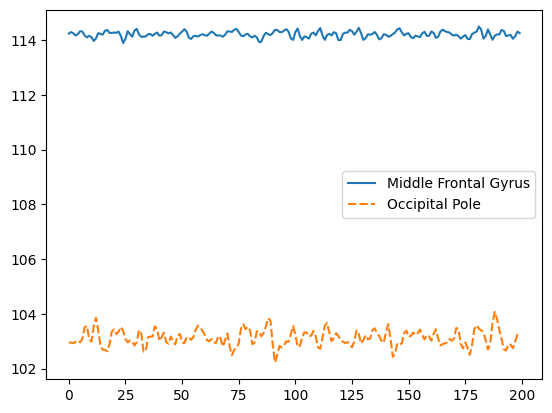

In [55]:
sns.lineplot(tims_df[['Middle Frontal Gyrus', 'Occipital Pole']])

In [115]:
roi = nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\postcentral.nii')

In [117]:
masker2 = NiftiMasker(mask_img = roi , target_affine = rest.affine)

In [119]:
post_tims = masker2.fit_transform(rest)

In [121]:
post_tims.shape

(200, 6895)

In [126]:
post_rest = masker2.inverse_transform(post_tims)

In [128]:
post_rest

In [130]:
nib.save(post_rest, 'post_rest.nii')

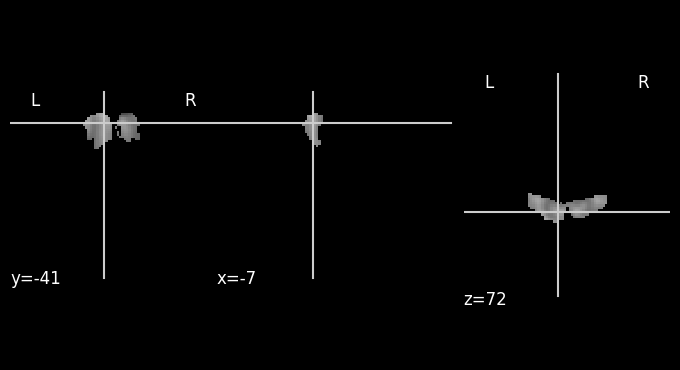

In [136]:
plotting.plot_anat(mean_img(post_rest))

In [89]:
region_index = HOA.labels.index('Postcentral Gyrus')

In [91]:
region_index

17

In [93]:
region_mask = (HOA.maps.get_fdata() == region_index)

In [95]:
region_img = new_img_like(HOA.maps, region_mask)

In [97]:
nib.save(region_img, 'psct.nii')

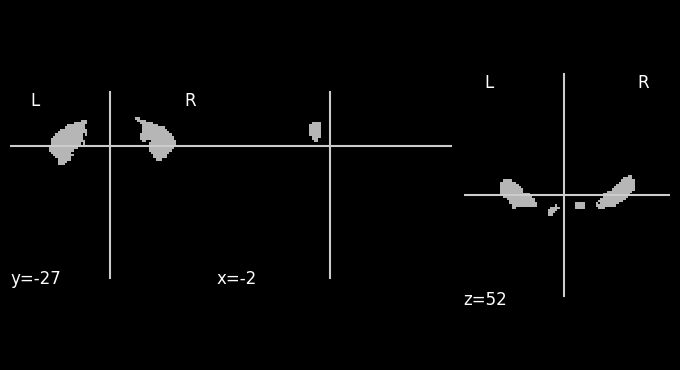

In [107]:
plotting.plot_anat(region_img)

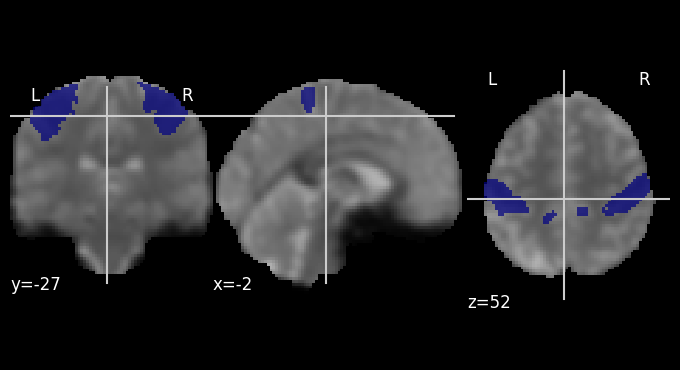

In [111]:
plotting.plot_roi(region_img, bg_img = mean_img(rest))

In [138]:
anat= nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\01_conv_FA.nii')

roi_img = nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\harvardoxford-cortical_prob_Angular Gyrus.nii')

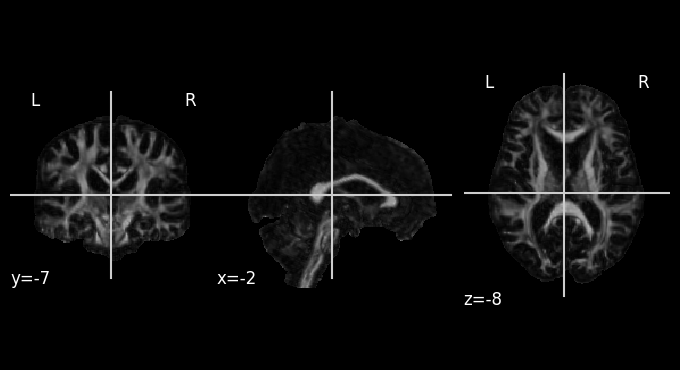

In [144]:
plotting.plot_anat(anat)

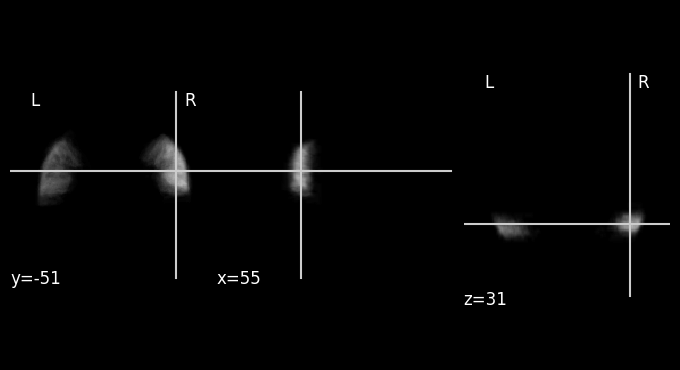

In [145]:
plotting.plot_anat(roi_img)

In [148]:
anat.shape

(182, 218, 182)

In [150]:
roi_img.shape

(182, 218, 182)

In [152]:
anat_data = anat.get_fdata()
roi_data = roi_img.get_fdata()

In [156]:
anat_data.shape

(182, 218, 182)

In [160]:
roi_data.min()

0.0

In [162]:
roi_data = np.where(roi_data > 0 , 1, 0)

In [166]:
roi_data.max()

1

In [168]:
masked_fa = anat_data * roi_data

In [170]:
masked_fa

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [172]:
masked_fa_img = nib.Nifti1Image(masked_fa, anat.affine, anat.header)

In [174]:
nib.save(masked_fa_img, 'masked_fa_img_ang.nii')

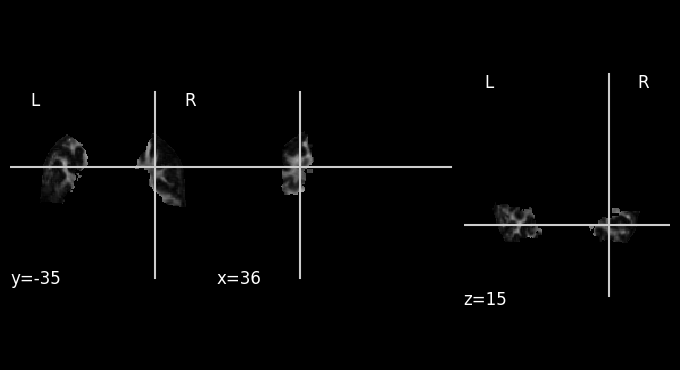

In [176]:
plotting.plot_anat(masked_fa_img)

In [178]:
anat= nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\sub-02_anat_sub-02_T1w.nii')

roi_img = nib.load(r'D:\course\fMRI_processing_May2024\CONN\mask\DLPFC.nii')

In [180]:
anat_data = anat.get_fdata()
mask_data = roi_img.get_fdata()


In [182]:
masked_anat =  anat_data* mask_data # why this error?

ValueError: operands could not be broadcast together with shapes (256,256,176) (91,109,91) 